# Assignment - 3 [Abalone Age Prediction]

`Submitted By- Rakesh M [RollNo: 718019Z235, Email: 19z235@psgtech.ac.in]` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## 1. Download the dataset
<a href="https://drive.google.com/file/d/1sIv-7x7CE0zAPAt0Uv-6pbO2ST2LVp5u/view?usp=sharing">Dataset link</a>

## 2. Load the dataset into ipython notebook

In [2]:
df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df['Age'] = df['Rings'] + 1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


## 3. Performing Below Visualizations

### 3.1 Univariate Analysis

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

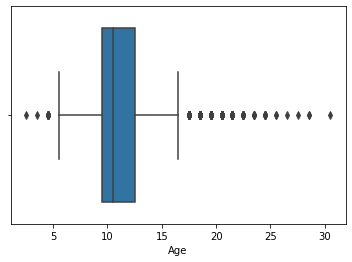

In [4]:
sns.boxplot(df['Age'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

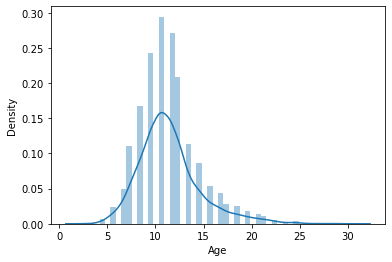

In [5]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

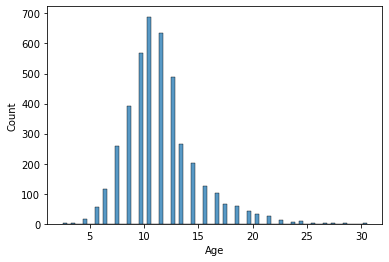

In [6]:
sns.histplot(df['Age'])

### 3.2 Bi-Variate Analysis

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Age'>

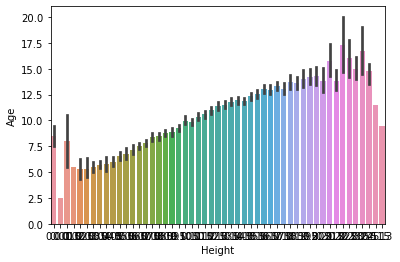

In [7]:
sns.barplot(df['Height'], df['Age'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Whole weight'>

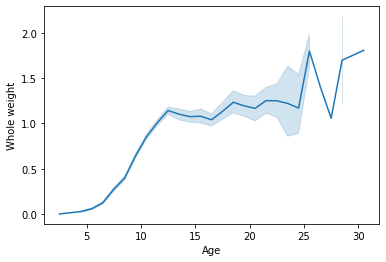

In [8]:
sns.lineplot(df['Age'], df['Whole weight'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shucked weight', ylabel='Age'>

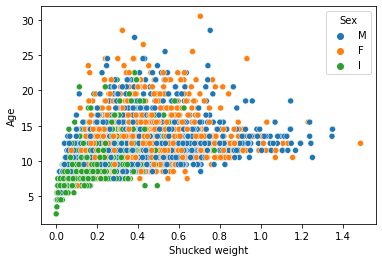

In [9]:
sns.scatterplot(df['Shucked weight'], df['Age'], hue=df['Sex'])

### 3.3 Multi-Variate Analysis

<AxesSubplot:>

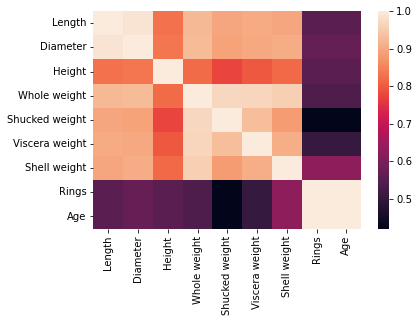

In [10]:
sns.heatmap(df.corr())

<AxesSubplot:>

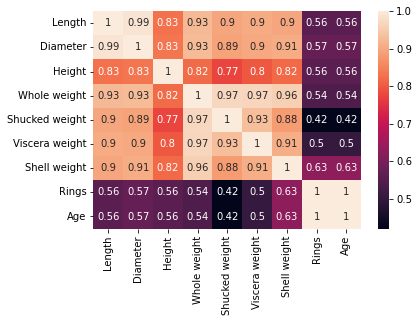

In [11]:
sns.heatmap(df.corr(), annot = True)

## 4. Perform descriptive statistics on the dataset

In [12]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


## 5. Check for Missing values and deal with them

In [13]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

## 6. Find the outliers and replace the outliers

In [14]:
print("The Mean of the Age : ", df['Age'].mean())

The Mean of the Age :  11.433684462532918


In [15]:
print("Standard Deviation of the Age : ", df['Age'].std())

Standard Deviation of the Age :  3.2241690320681133


In [16]:
q = df['Age'].quantile(q=[0.75, 0.5])
iqr = q.iloc[0] - q.iloc[1]
print("The Inter Quartile Range for Age : ",iqr)

The Inter Quartile Range for Age :  2.0


In [17]:
lower = q.iloc[1] - (1.5*iqr)
upper = q.iloc[1] + (1.5*iqr)
print("The lower and upper quartile for Age are ", lower, "and", upper)

The lower and upper quartile for Age are  7.5 and 13.5


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

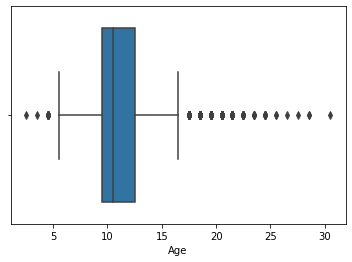

In [18]:
sns.boxplot(df['Age'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

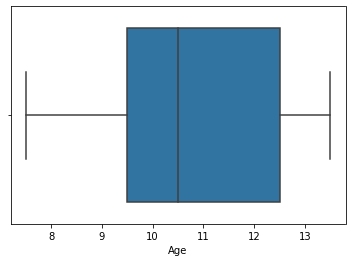

In [19]:
df['Age'] = np.where(df['Age']>upper,upper,np.where(df['Age']<lower,lower,df['Age']))
sns.boxplot(df['Age'])

## 7. Check for Categorical columns and perform encoding

In [20]:
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,13.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


## 8. Split the data into dependent and independent variables

In [21]:
# independent variable
X = df.iloc[:,0:9]
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
# dependent variable
y = df.iloc[:,9:]
y.head()

,Age
0,13.5
1,8.5
2,10.5
3,11.5
4,8.5


## 9. Scale the independent variables

In [23]:
minmax = MinMaxScaler()
X_scale = minmax.fit_transform(X)
X_scale

array([[1.        , 0.51351351, 0.5210084 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [1.        , 0.37162162, 0.35294118, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.        , 0.61486486, 0.61344538, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [1.        , 0.70945946, 0.70588235, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.        , 0.74324324, 0.72268908, ..., 0.34298881, 0.29347285,
        0.32142857],
       [1.        , 0.85810811, 0.84033613, ..., 0.49506254, 0.49177877,
        0.39285714]])

## 10. Split the data into training and testing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.3, random_state = 1)
X_train

array([[0.        , 0.64864865, 0.61344538, ..., 0.31928901, 0.2077728 ,
        0.42857143],
       [0.5       , 0.64864865, 0.6302521 , ..., 0.17774852, 0.20727454,
        0.25      ],
       [0.5       , 0.66216216, 0.63865546, ..., 0.20737327, 0.25261584,
        0.28571429],
       ...,
       [0.5       , 0.33108108, 0.31092437, ..., 0.03423305, 0.040857  ,
        0.14285714],
       [0.        , 0.60810811, 0.59663866, ..., 0.21395655, 0.17787743,
        0.21428571],
       [0.5       , 0.2972973 , 0.28571429, ..., 0.04147465, 0.03836572,
        0.28571429]])

In [25]:
y_train.head()

,Age
3213,13.5
4080,9.5
1891,10.5
3566,10.5
3438,7.5


In [26]:
y_test.head()

,Age
17,11.5
1131,9.5
299,10.5
1338,11.5
2383,13.5


## 11. Build the Model

In [27]:
lin = LinearRegression()

## 12. Train the Model

In [28]:
lin.fit(X_train, y_train)

LinearRegression()

## 13. Test the Model

In [29]:
y_pred = lin.predict(X_test)
y_pred

array([[10.60222523],
       [10.20529671],
       [ 9.91079342],
       ...,
       [ 9.78145937],
       [10.12504675],
       [ 7.12219693]])

## 14. Measure the performance using Metrics

In [30]:
r2 = metrics.r2_score(y_test, y_pred)
print("R2 value : ", r2)

R2 value :  0.8234006781080225


In [31]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)

MAE :  0.6383905903849098


In [32]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE : ", mse)

MSE :  0.6859530778081977


In [33]:
var = metrics.explained_variance_score(y_test, y_pred)
print("Variance : ", var)

Variance :  0.8234850072830793
